Machine learning aims to support your analytics to perform actions such as make predictions. In this example, we will work with a simple machine learning model called K-nearest neighbours (KNN). KNN  can classify a value according to the nearest neighbours that represent the predicted response.
Here we will work with the famous iris dataset where flowers are classified into three different species. The dataset contains a set of 150 records under five features - sepal length, sepal width, petal length, petal width and species. Firstly let's use the scikit-learn library to import the data and use the KNN classifier. 


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
data= load_iris()
#iris_data= pd.DataFrame(data.data, columns=data.feature_names)
#iris_target= pd.DataFrame(data.target, columns=data.target_names)

Let's us check the first five rows of our dataset using the head function. In this case we extract data from the dataset and we create a new data representation. Finally we print a sample of five random variables, as we can see we have different types of data.

In [ ]:
pddata = pd.DataFrame(data['data'],columns=data.feature_names)
pdtaget = pd.DataFrame(data['target'],columns=['type'])
mydata = pd.concat([pddata, pdtaget], sort=False, axis =1)
mydata.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
94,5.6,2.7,4.2,1.3,1
137,6.4,3.1,5.5,1.8,2
104,6.5,3.0,5.8,2.2,2
81,5.5,2.4,3.7,1.0,1
108,6.7,2.5,5.8,1.8,2


Let us see what each type represents, for example type 0 is setosa, 1 vesicolor and 2 virginica. Each flower measurements represnt a different class of flower.

In [ ]:
pd.DataFrame(data['target_names'],columns=['type'])

,type
0,setosa
1,versicolor
2,virginica


Let us see an example of the flower classes, we can easily identify the different spiecies by the combination of sepal and petal sizes.


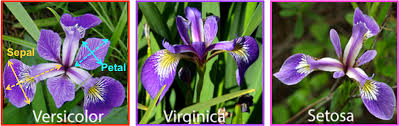

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMVFhUXGRoYFhgYGBodIBgaHRcYFx0YGxgYHSggGholHhgWIjEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0lICUtLS0tLy0tLS0vLy0tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAH4BjwMBEQACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAAFBgMEBwIIAQD/xABJEAACAQIDBQUEBwUFBwMFAAABAgMAEQQSIQUGMUFREyJhcYEykaGxFCM1UnLB0QdCYnOyM4KS0vAVJENTVJPhFqLxFyVEY7P/xAAbAQACAwEBAQAAAAAAAAAAAAADBAECBQAGB//EAEQRAAEDAQUCCAwEBQUBAQEAAAEAAgMRBAUSITFBURMiYXGBobHRFBUyNFKRkqLB4eLwM2Jy0gYjQlNjFiRDc4LxwrL/2gAMAwEAAhEDEQA/ABm0Nv5NqTQzM3ZvI4Vs7DI3auBex9k6Dw0rM4IPDjtqdpW7eNvnsxjZCQBwbD5LTqOUFMRwg6v/ANyT/NQw1v2Ssvx3bfSHsM/ahe8eFmEJfDPIJEuSuYnOOYGYmxHEdaIyNlc+096s2+rYTQvHsM/akNt4MbbSZ7+JH5UXgYuX1nvRPHNq9Iewz9qlwO1se51nYddR+lUc2Ef/AE96nx1adcQ9ln7UWw+PxFwGndmOgVb6n0191BwA6DrPeheOrZXJw9hn7V8xe32S4aSVGBsR3yQfFTqKsIa//T3qfHFu9Iewz9qkkx86KXaVz0Ab/VqHQE0Hae9CN+W7Y8ewz9qCbS3kxaBPrHBa5Ot7DkKYihY4mp6z3ojL4tjieOPYZ+1VBvTi/wDnv8KL4PHu6z3onje2emPYZ+1d/wDqbGHhO/lprUeDsGo6z3rvG9tGrh7LP2pmwe1ZJosyyOrqO+uY/wDcW54dRypORlPJ7Tmhm+rb6Y9hn7V+wm05XUgSvnj9vvHvKeDDXkelcGgivxKg31baeUPYZ+1DMXt/ELOqCV8ulxc6g+PGisjaWkntPepbfNtIrjHsM/av20d4J45VHavlJ4XPz41zIg6vJynvXNvm2keWPYZ+1HIZ5mWSTtXypE7e0dTl7vuqGsbUd571Avq21oXD2GftWz7pOTs6Ikkns21J14tzp+xGsbKpm9gBbpAN/csdi2o92Bdu6be0eFgQeP8Aq1PXheVpitUkbHAAHIYW9yQtNpkZK5rTkDuHcodp7RnUXWVgPP8AWkje9s9Mey39qALZNv6h3Kvs7bsslkLsHFyTc94eXAWqrr3tozx+6z9qk2ubf1DuXW3NtSxJ3ZGDE6G/ADidamO97a45vHst/auFsm39Q7kCwu8uMdgizMWYgDhz9KZ8Z2r0h7Le5d4XNv6h3KxvDvLiY5zHHMwCgBuBu3M61zL0tRbUu91vcuFrmpr1DuV7ePbeITKIXfRQZCNe8bWBve1dZrZeT2GVxq2uXFb+1SLTPSteodyX23rxoOs7jzA/SjOvC1t8o0/8t7lPhU2/qHctC3XnebDRySOxZgbnMwv3iOANuQpKa97Y11A4ey3uVHWyYHXqHcifZ6nVv8bfrQvHNt9Mey39qp4dNv6h3JG3/wBtYnDSxiGVlVlJ631H3r9acst6Wp4OJw9lvcjxWqVwzPUO5LmC3s2hI6oMQ12NuC/pR33nOxpcXD2W9yu60yAVr1DuRl94MV2zIs7ZV05anmeHnSrb1tZaCXDP8re5BFrmpr1DuX3ZW3cXLili7ZsuaxGnDnraumva1MiLsQrT0W9yk2uUCteodyf8V3QTmYW/jb9awI/4hvNxpwnuM/ah+Gz7+odyCbOxMzIzvI3ezMguRlS3d8yeOvUV6iw3laX2iON7gQSAeK3Pq7ExDapHStYTtFch3LYN4XP+z2NzfJHrfXVk51eEDwmnKfinruANsaDy9hXnHC754y/enYjyX8hSptk9Neodyo28bTSuIey3uR+Lb87AETn4UsbwtIPle63uQXXrawfKHst7l2dvzDjK3vqPGNo9Lqb3KvjW1+kPZb3L8dvTnhKw8b1D7wtIFQ7qb3K/jO1UriHst7lWl3jxA4TN8P0qGXhanf1e63uUNvO1uPle63uVGbevF3sszD3fpTQtk9PK6h3JgXjaPSHst7l+O8+MH/Hb3L+lT4bNv6h3LvGNo9Iey3uUTb140f8AHb3L+ld4ZNv6h3KfGFo9Iey3uUg3sxdv7ZvcP0qTbJt/UO5d4wtHpD2W9yhO+WLBBMzEX1FhqPdVfC5/S6m9yjxhaPSHst7kwbT2rijCJYZnAsC2gOh56jSkrPeVrMhY81/8ty9QQ23naSaFw9lvch2A3ixbOM07FeYsuvra9MT2+0NYS12fM3uV33jaAMnD2W9yOYPH4hpGvK2RQNOrHx40g+97UIwcQr+lvchm9LT6Q9lvcq20tvy9plikYAcedz60aC8rWRje7L9Le5cLztWpcKfpb3KGbb2IUXMraCuhvO1SPpiy/S3uVI70tT30xCn6W9y53J3mxM+IKSSMQEZhy1zKOXgTW3Y5pJHkPNRTcN45FrXdaZJ5iyQgih2DeNwQnf6LNjp7e0JX9xlesOGtXc5Sl7tPCx/9bOxMG5G8BlBw8p76aRsf31HK/wB4fEeVVkZTMLFfGQKprGlUBQln+++yxAe2RPq3PeA/dc6+gPEetXa0uNAUVtXZBLqzHgLgEXv6XqxiwipVuDpqh8ua9yT1vfhTDAKIjRRNuxdsDEgYbFEs4H1E372nBCx4npfjwPKkpYuB/mR+TtGznG7lVXg6hB3wU6YoJ3s99GF7Op5+VuR4U1HHwrQ2POuiqAHNoEc29sB5AGACkcwbi3PMvEelHbd9oiaXOAPMc1DIXsFSEvnYpXRwWP8ACND4gjjShtA2KDJuUsezpDokVvFiFHvNN2exTWgYgMt6uyKSTML6mExmHYTCO+X7lmB8DbkRV5rtkYNPUrPgc3UIwhUNHiYgRGxyyIeMbHih8DyrKc0io2pcqjt/DBJM3Ir3SeYJ+dTHmKLhuVXagzKrHpapiJDirNJByTfs3DsMAb8Xjcn8OU5fyobncYDl6lWua2PdD7Ni/lt82rRsP4bPvat69/P5Of4BecJcewx7ILkMQtv7oIPv+dMXvGOHkdtqs21t/mu50wFgyWrGqkUCnzRsGXipuPzHlVwARQqQqW8W0xKyhfZAHv5iiQRFtSVIC42NEysJbaJ3qs94rRcSqmOdmcyMCM7FgSDqL8jzowjc1oqFK1H9m2Hjm7QuuZSefMEDT0r0sRIs4puHYngKtCs7z7qQOZI1NmBBQ8wCND+XoaMWttMeGQfIqSwOFCqezpxhMEpfUR3U2/mlb/nXi7VFSd0Y2GizXt49FLsveaGd2RQ69GYd1vJhpfwNCNnkArRQYylb9rad7Dt4OP6aZsehCLBtS5ucoDySkewhI8zwrraeKG7yrTHKiKYLBsgJfRj3j60Nrw7NumiFVXdwMPmxOfzNL3i/DAVztE8bTGYEHhz8unrWTYmVfi3IYVO2hPgfka9Fdr626IfmCYsn47OcLVd4vs4/gj/qStmHznpPxWzdvnjensK8pRLe19AbVmHRZ48lNOEwUaqLG9JOkcSlHPJK+YgovOoBcVwqdihkOVLg3rsJJoiBuwqoHJow4qkHBkueytraiB4KI14KrzYgk2tVgiAhcOp0vVguqrKx3GtQoKuYTYrSC4GlCdKGoReAnDZS9hhxE2obMWB6E2A8rA++t264GOhL6eUfkmYGhzcSD43YzRsXhVmiOoPHL1XrpSFrsbmuIaMkN7aGiKSS5IzYanWvLyCrqdCVJQDArdmc86bnOFgjCmY0GFfNpXsBrrw8fL40ayMwtxFEszMqrr9n6qMY9r/2TXv+OOt67jWQ83xC2ropw5/Se1qh36sNoYg5rN2kg1Gn9rJWVD/VzlUvYnhI/wDrZ2ILhmePvxtmKsGGU8+tXcKrNxClFqe7e1jiYQ7oUkGjrbQ9GXwPwpV4DXZFJvZhKIYrCpKjRSC6MLH9R0IOoqWmhVWuoapAm3VaMmNnuATlIHEHnUSWk6URnPqoodgLwJY2HE86GbS+tQoxuU8ex0TUKoI4HyqDO46lVLnb0X7cuhkWxMdg+l7ZtCfw6D3+FbX8PsZjcTrsTFkDcZJVNNoctefx0r1mAFalAVHLMLALmso1tw10uaC2yQtdXCAeYIHBRtNaBU15f69aYDAMgjNy0V3AM1+7r18PG/KqvoBmrEimaMT4yONPrStm0t97r5kda8xetmiw8K3I7t/Qsq0xsHGbkhG1tnLJCY1OYavCeo5r5jpWDE4sdyfeSUacJQLB4YyiOLj3gT4Lz+Rq+OjiVfEnXGYxVw8jHQZCqjzGUfE0rG7E+v3yoYzK1fdD7Ni/lt82rZsP4bPvavQXv5/Jz/ALAtg7KaTaUkpHcjI1/iKCwot+yBssg2krMtrv5jhyojtmIRTG3svqPXj8ax4wcNDqlHNNM0Nx8dx40QKoSz9FLyrGOLEAetMtdRtVfYnHbeGjw2GsNWuAD/4pWIuMgPSqilaobsnaZEnYS/WYdiVMbHu2vpb7p6EcDXrTE05UWgWAiiedh4P6KkuUkQizR5rZlDGwQups4JOhsD1rrM98XEkGWzuXRmhoodpMfpcQYnXuN42a/wCdab3BratTLhlkr+PwOXEnChQYigmFwDYF7ka8TmBHDQV5ttmEtrJPOkhE0urtVyaGNrxsqZSP8J1Ucel62xAGtyCMYqBYrvS7qRA7ZuyZh4ZtL28NKxbS1ofkM9qC4CtQvu702Wyji7rfyBvWRa24s9wKWkzKadrv3ZH6/wDxQ4GYGNahhW/2fw2zN0X5mkr2d/LDd5XOTFjDdrdOPnQYRwbAFWihxEgVcvMgj4H4Cte5mE2yNx9IJmy/jM5wtS3i+zj+CL+pK3IfOek/Fa92+eN6ewryqvsjyrNqkWnihSQTtwvVCBuUUC6kvfrXKBQIg6nJagV4yBi46iia1GLQUYtqr+FN+Ipd+WiEWUXOIw3QVZj96uxUniHOjAo1F+OIXhVlxomHYO0UZchNmHxpC0RuacQSkrCDVFcXDIz2jBOWNSegUkJfyuwr2V3Oa2yR13J+EhsYV7BCSLMkgugIGYaqTraxHUDSmCWyZjVXq13Or+K2eJ0MYIB4of4v0PCse23cyQYgM9Uu6FJmIUxXDCxHtDpavK4HSSYTqknAvkooIDmYFxryvyHIDpTrqtyGicxNYjW7OEVcQzgWJQj4r+lP3Q88OWn0T2hal0Pa+0Ej0T2tS9v2B9PxPUSO3ulk+FLQaO/UVF6/ix/9bOxDdj4hYnJyjO3sgjQ+tWeC4UWdhDgiUe+UqOMsIzX4A6HwPhQuAbrVBLG6LRdlbRjxEYkjOnBh91uY/wDPOhULSlntwlftsYZpIjk0ddV8RzWqyMxCq4HYkybBYo+zJGf4eBGl+elaTbokwhxaPWjiF1KkINtBMZAM89wh0DAgi54AkHQ1We7zENFzoqKbdDb/ANHxCsx7jd2Qfwtz9OPvqsNYnVC5owlaHFsDCSFnVGY2PdVzx4iwHI8vP3eiFpmFBs3prhHLnC4RHWTB5OxRmVmvfM1rkKTx8r6X11rpi5tJgakKrgfKqg+8GyIIA0hZlVSAYwAxzEaAG+g0J72vO2oq4vHDHieOlWE5AzS/Bj+0GUOIrnuBrAMRobtxDePCse03w8uPBjpPdoECS0urxQhOMEvaBZDqDax4jy8KynyF9XPJJSxJOZ1RvYe0AD2bnuE3U/cbr5HnSxyVUTTAqjuw4toPC/G1AmfTIKrjsVHb02ZkhFrCxa/wq0A1cNmXepGQW57ofZsX8tvm1bFh/DZ97V6C9/P5Of4BZzhY0iiDW0YZ38bil72cXXk8a8ZY9rP893Oqv7RcPGmGjdQWKpCqgDWzZiTVpY+Oecq7+M1I+ExQdQb35H8qGWUKWIohm1omRgw0INx86IwbFIKn2vtVsRkudLXt0POhtZhJXU2KHFWsjrzFj4MND+R9a9PCcULXci0GZsBTtsjGmaONWvlSSLNqbHv2vQJ5g1wadTp0aoTzhcEY3ww5jnV+Qca+H+hWmHYoFqBtWAp0xsPeSVbZmiVfE5S7Eeob4VnWYDhXEpBnlEFA9pw5nPDvFSenJm+RrYjNGiv3uTVMljG/aj6ZMB98+/Kt/jevNWp1Z30Wa48YqDYMd5U8NazptKJdxzTPtfSIDqaE3VVCYNz0yRO3S3/gVn28Ynt5FBUm0doJBG0rnQa+JJ5DxJroIjK+gUtFShGzMS8iiR+L3Nvugg2UeQtW/d7Q21xAaYgj2fzhnOFuG8X2cfwR/wBSU9D5z0n4rWu3zxvT2FeWY49B5VlLPYcguVXWuV6K3h0uwqHGgVHmgRORdDS+1JtNShuB7z2NGkJDU07RMohAHCs7EapckqOUgA0QVJUA5qtFu1ip4TiIwpUk5EvZnymxy6W4ggXOtq14oHOZUJtoJCX+yzA8iOI8ehFD0NFNFWRmVr8CK4ioXci1CEu8SAknKo+AGvwvW9Z2hjWtbuRmNACl2TiiytGwJWSwsvEEG6sBzseXOiSENcCNQpI2hW8ZFLh37OQEG/Gx1tzA+7rR43smbiCI0h4Qze4xDJLILhgAQDYs4bSw5i17/hrzt4QtZNibrRLPAa6qHRolh9Ze+veFjry00rKJqdEA4X5VRLd2QmYg8lPDzWtK6h/uSfyntatW5G0nd+k9oVfeHYySYvEPc5jJKp0BFu1flxFY5tT4nuFMqlUviQtmjH+NnYgn/pl1WyMJLWtc6jXlRBbA86fFZonbkq02GaHMTEwZjxtcAHQ28auyVrzmVcSNNXIzswPh2EkXQZ0PB16eDdDRi2uqVxb074XFpIglQ90666WtxB6EVSNhdIGDaVGGpoEpvifrCb8ST5Xv+vwr24bQUWzSivQyEkqQCt9QQCNLW0PpVHNFFUgEILvNsYraaBFCt7YUC+bqOQB+dYN4Qhrg8bUpJxTkmzdnCzRwxMbq5QBufO4v42tTllFIgx2zRXZ5NCpcWjB3kJvc3v5c/hTYIAorhJW9O1UlVMNARI+csQikC1rIq6d46kk668TWRPK1/FjzzQH5ZUQ6DdDGMLSoNOALIPQG9DFglJq0AdPcq8GdgRCHZc9linw8pA9hwAxT1W+ZfD3Uq+wWhtaCvMgOY4VJCG4/Zk0ThWQrmNlaxAPiCeNh7qWlifG3E8EBBZPE8kNcDTWhBTDgzoANbD31jPJLlAzKV5Z2aXPa5eRVA6d7h8hWtGwNbh5EXkXo/dD7Ni/lt82p6w/hs+9q3r38/k5/gFl+02c4ZVQXZ1VB4CwudOlAt7sN6SO3OJWPasp3nlR4lHggViC8SqpP3iMy/I3pS02nhA7lXOFYsSxzenZj4PEuFuEbvJ0IJvb0NMWWUSxiuoQwahQS4ztY7sLWspPIkjQDx0pjgnAYti7DTND4ZLA35VVzakKaIlu3H2weAkAt3oyeGfmvqPlWvYJBnEduYTcBrVnqTLufMQ7RNoeYPJkbN+RoV4gBrZPRcD0HI9qidvFDty1Xf7ZeZJHUXGUOPQg/nT9llrHhWnZXh0VFJHOOzw9zYNETfyZAfLRjSsLv5p5kkRSQqpjYgHJJBta49LEepp+a1tggMh2ac+xFklDGFxWC70Yd0xDrJq+diT1zHNfyN684yThKv3rLa6oqi26mDuHkPAWUetKSv/mBvShEo/i9nPMVRB3rga6ci2vTQE36A07ZrO58Zq2m0HppREZGSNFdw+OSI/RDoyjOx45mPyABXjrr10qBcrppeO+m6maI2zuccNc0r744eaWRNQYlI7o0IJ4swPPl4e+mzdjrNGS3PermF0balXdnbWiZ1jUkHUWI8CKDdzT4VGfzBCsoPDtPKt83i+zj+CL+pKdh856T8Vr3b543p7CvLzOABaskaLPjFAFwiEsLVKsUVUKgBNVcKhUcKii/YnEArZeJobWGqDHEaqjh0ya0c0ITFAjmz8cHFqz5oi01CWeFFjyeFTFvVG6p22DLlwUK/dzD1Dlre6vSWIh8II5k/GQQlneHZCmbtV07TvH8XBvfof71Zt5EwzV2HPvQpThcqGzd33nxEcCjvOePJVAuzHyANAhk4Q0XNfVaRicMIY3Swzeytv8AXQfGvTQuqAU4Boo93ssMgcqCQRa5Ayj95hfQt7rAHnWPeVpPCtYDQan73Ichyov28e8UEjXSHO1zeQ3At0AJJPwoUd64Dgiz7Esyeho1ZvtSZ5Zs7eyDoOngBQZJC8lzjmUSTMK7FJY3PLh4UniAGSQJGgRXdeXNiCb/ALjaeq61o3Oazu/Se0LbuF389w/Ke1qp74RZcXiHzFc8kqggkaiV7EHrrSEDmmRzTvKve2c0Y/xs7FWw+1ZEfIxz3CsAw9kEDuhhrxvzoUkTS3FTQ0WMWCmSMYHbyMxRlZeV9GU/nVjZ6UAPrz7VV0dBVFvo8b6gA/hOvuNcBIz5dxQlDBg+yLlXYKy95bc7ix19RWpdbg+fMZ0TFmPHohWLhNr6eBHA+F/DpyvXqmlaoU+FlBJfXgfQ2UcPfVXCmSqQjeJkB+jxlf7eZY1t0AJI8rD3msi3sxNDeUd6TnFRRNe2AI1UcyfysPmKvBxlZgqh288ATAzsNPqmGnHUZfzocshoVVxS/utsKOKFGaNDiArd6wVgCQct+oDAX9KLZYAxgqM1g2yS2QWsyNcRFRtajEBWorsyFONQggGtDRTySE6eJH6/0mng2ma9MKahXYUIFzcEm68tOAueQ61U6rPlk8IPBxBr21o8nMClKim1x2bAddKIbvLiRJHlsrHQLwGvMrfXlwpC9HNbZnYxrkOdKQXbHYontbq51ejZ8SeUmmSRtq7RMOTQjUHmOB4V5KCAvJKNFHUEqzisMJZIJ04domcDxZe/5daZa7Ig6rgt43P+zIv5bfNqfsPkM+9q3748/k5+5Zy2ISOFGcgAKDc+QpS821t836isa1is7+cqjsHbS4oyhA2WN42zW0OpHHlSM8ZZQnbVWYP5LgV+3+2T2+GLqO/F3h4j94f66UOyS8HJyFLMOaBbi4DC4rDlJhmaMt3b2PfK2kuNdFXKDyua9nY445ow07K5c+1ORgEUQram5/ZyOTKscGrKzhiQpJyrZRctbyoMl3PDstFDojXJUcFggikxOXbMCCFIsB66GpbdspcHNcBRXZC+tQUSx2PBkEoDo7XEmgsTawcEHj18qPaoXPYQ4ajP5Jp7MQoU7YjfR5VVCxKdmF5WItbkKdis8TW1aOVWY0sHFKEbN3qkM6RO9okQhb2st8pbXjbQe6kbW1sVHtG1VIq6pV3G78pJMIcNGZTmyqScqkk6t1P6X60rNZnWoNa91AhyQ8LQVyR+PYUcjdrNhsK72Au6s2g8zb4U7Fd9libhbU+pXFjjYKAlGvoESrbs4YwDfuxoAD1BAqPBIS6obVU4BoNQsm2ntyWLFYgqNWbLdtSAONjccRa/DQW4XoNtlbZy2NuwKDUaK/u1sdpUlxirxYKJHEkjDm7Ds0yDzvpbSx1o1knaSqxuw1qgeKm7xXWwvxUi/wDdOo9da1SaiiaxYhQqTZWzlldZx3WQnN42BHvPGvPws4G3sYNMQp0pCEYLQ0cq9BbxfZx/BF/UlXh856T8VpXb543p7CvMWHwZIHlWXqkGeSFfw+EC8ahSvjRZza/pUF2EVVSQEQTZgUX50q+0bkJ0o0CjfCA0PhkPhFGMJl4Vczg5FdjBX4RknWq5UyXEZZJk2FJo0ROjar4MPyNal0T4XmI7cx8UWzuocJXO1JBlHVWt71APxWi31HVjHDeR61e0jIFOf7PcAsMEmMk9qRSE/hjHE+bG3oBSdihpTeVWJtSq+FviJS3IcPU6/p6VuyyCNtAtBxDRmhO3yBiJIwR3Qo4ajS5F/XwrzF4lz3rOtDyRRBcQ1r9Ftr/EeA92tLWNpBr90Qoss1XkhWw0oDpnucalVLnEoTi5O8QtMRg4c1WiMbnZvpBvw7Nv6krZucATO/T8Qtm4h/uT+k9rVPvBITjZ1IQr2zmz+zrO4OboOGvnWOWjG41INTpqrXv5xH/1x9iY9s4ATNCJiY0M9srdnqCjkCGVQD2Vwq2I5rrca5UcpY04MzTZXf8A1A7duSDIzHhD8s+TdsO7nQ3D7BiV5MsLsyRRuIs7Ah2kZSO93rFQDZtePhTrbW+jC5wAq4YqA5AerXboqPhbQ0bXIZV5UTi2JFmlsCQGdUcOSVKxhrHKMosxtckk24c6qbbLxCcjlUU1qac+m7TehiysOIc9DXk9XrUW0sX9cUJ7rJGPImNDe/n862rklEZBdtLh7xQnPDJ89w7AqM+EK3NwF4EN+9yvw1869g1wOSfBqhEjmJtfYa3oQb6/GiahX1TVG7PiNm3AIDux14WjAFh4ZrVh2xwEgA2kpKagdRGt48RmxMUY6i/vv+VMQCkZKNG3iVUm8+I1ihBFgDLIOqjRV9W+VZ+EyytZ0no+aUPGdhS7NIxI45rsD10ZQPU5L+lbrQPv75U3QUNdOrlV6S2pIBlA1UHgL2zfiHP311Krztnle17GMcRZ3O4pIzO5lTox2eEkVI4ooKE1mmLd5zfw5e/h8zXUpovQxxMiaGMFANAEr7exBeRUH7o4eJ1t8vfXnL8lDntiB0zPSkbWccgaNiX0xhb6rFqzIW0v7UZ5FW6eHCs8AM8hSWUGSmikeNmQG1jZW5FG0B9OPpVCASChZZUXoTdD7Ni/lt82p6w/hs+9q3r38/k5/gF5q3z2i7zdnmORFQAeOUH86YtsYba5XbS4rLtI/nO504fsyiK4LFAhhmZWvwBAGl/WvK3rI91qibGa8g2nmVG5ggJz2XLFKGBYEWNxmA104k6WN/hW/ZrjcG8JPlyd6vHYjTE/JWH3Qw+HBMOGWOTvZWIUk6DTOWNje/C99NKrbrT4Nhcx1Ob7zTDWt2BK2242aN0kjYEqQOGhHDjbpWrZ78iljpJrvGnyU6JVwgGHBLRPISOCkC3ib/lVvGLNBU9S7GRoqG0dvR8DhSL8zIb/ANNqEbY47Fxme05nJQ4HFKQQhNjrlPEa8iOINOWS2VOByODiCqtFne1+Nh58gvmdKpbZgwKmlSU24jDPg5AuHZYFUDtMQ4VmJOpSNSNSNOA56msRltkeK+oBLRvMgxHRWJd+TAQpbEytoT2uVBY6g5FW4BqOHtRzD6c2a50rG8qP4rE9pluWHaKGsp0vbS2bgfhRLvvm0vqHOGtKkD5KjLVU0IXGC3Vwxu7FnbRrScGBBNmAsVYcxcW94oFss9rxF9a11I1R+EG1E8cmSL6gGKO1mAdlKEk5e+PaiJFu8NDoaLdrsD6O+XyQpDtCy3ahZXcOpDg97je/EjUn5m9evxgsyR2uBbki+5F2hmY/ea3+AViOdW8YecdqXBraWc47Vuu8X2cfwRf1JVofOek/FaF2+eN6ewrzlhDlUFjyrJGiQboFUxGILHSrLqK9u5hWdiQpa3E8h5k6ChyRSS5MFUORhOQTSuBzELmQsdAM3PkL8L0M3RagKkD1ofg0mqixGzmS+ZCtjYkjS/C1+ulIyQSR+UEFzXDUKliJlUUNrHOKloql7EYomQWrRiioM0yGUCMxYhlAYcRY0RnEeHDYoAoaq9vB3oyynWTsyvjdsvpxrXtcjZI6b6FNSUcxO28m0BFh4oE0vlUD+FQPztQ7IONXcps7M6rrByjD4cydB3R1c6Ae+hWibV25VmdUpNwuynkftHcqpbMxHtSG/srfgOreg8B2KwunHCS6HTvQWML8zomXZ+xMO7EGM24kl2Ovne2n5U8bvha0gBEMbQlPa8iqSqm4BIB6i9ga8gYwJXAaVSLsig+JsmXxpuJpOaKG5VR7dWxnuP8Alt/Uta90fjn9J7Qta5POXfpPa1QbxITjsSBreWQAdT2r1mNidLJgbqXFUvoEzRgf24+xGMVuYmHSzs5BuCVIC6nNoLac+Pjy1rRu9tkt7KBxxDMg5HLKo3jl9dCl/A8qFDcNsZ41l7GTtEcKHTKM3dOYcNGta+lj52olrusx0c3Olab88kCaF7GFo0Krqo92lINJos8hfpnKkWtY1z60qFIGSM7Oxs4FuydweVjfyzWOnnT1ntk7RRzSUeOZ7ctV3iskqN2mExaMbd7sywHll1PurTZbSdRROx2gnUIVsXFFMZh0kv8AVyMyEgroyFSLNryHGl5X4nIjwHNqEcwe0O32jx0F/hYfrTRcGxURnDDGpNobQ7WaeVACqOiEm9sqXtra1r5mPQUKyNGIv6FmOtEUErWP8p4NOj4kmgG0qqZHBdVIOYkvJY63vmCfw8s2nyNbADQB1KzI32jBLMCwDMMr6i6m38tSBtzVrCukdiAbjW9/0FvfVXYnJmaFk7DHIKtORCvYyIGPtFAsLGws2mt7ZeI4VSuHMrz9kvd0dpFlmOQDuM4FpNKYa1pnSoOw5EHNZftcNm4G+a7KQQddedeONXTOc8UJrSqehLXcauu1UhjpFe180Z1ytqPQ8jUljS2u1MOALeVENmZWVbAhVN7nXLf90n7psbeVBka6jigOpiptXofdD7Ni/lt82p6w/hs+9q3r38/k5/gFgDbMjOJZn7xJBt0AUV18TO8KkaN6yrWf5zudHY9oG5RbBAeHeszDge7yFbF03QyECV4q8jXcNw+KdslmoKnVOu7MrllAdspubJGhN+P/ABCxQcRfTW3W1O21oDSSM+fupVEtAAGn31Jm7MhbWyDnbU3J0UEjVvgK+eXhKZJDRCal/bGBD34G2UeABubk89Be501HoGxWWZ7qtUucFlf7RcWYZhDHYMqgv4MT7Ppb3EV6HgMFGkpaSTCaBJ7bTZhZvkDVhHTRRwm9X4JQYsyZbr0HDofyt41XhC1wTLJBTJWNiRO+JRlTMVYMq8ibEjXzsfSutk2IGqicgg1OSeMVhUwqHFYpu3n/AHb8AeSxqeHnWa15k4jMh96rMkmL+K3IJJ2gr4oy4pio1Ay+SgaUzwojLYuRRpknHZeJ7SOI9EA91KsZga4cpVDqu49sPF2neIzMGH4gDck9CFT/AA+NehsEvDR4Xajs2JuM4256hVNk75r30l7wbuAE93smIVteZF83mtMCIVp0qxbsSWRJPL2UYzMCQW5WBtmPQUaW0iNnGVi8BtStL2RssYfDGMa2Vix6mxJP+ulY1jmMt4RuPpDtQIH4rQw8oWqbxfZx/BF/UlaUPnPSfite7fPG9PYV5luzC591ZTUg0ZK/sHZnaszvfs0IBtxYnggPLqTyFNWeDhXU2Kw1THijIVCqCkY0CKLD3DUnxrfigDRQI7Qim5WxmklL5FZFurHtghBI5Agk8dQwymh2x7Y2YdpVZTQUTNjgI3KOxKlR7VuGXIb2JF9OPlSkDGzMNRtVGAEZoDjNhYWR7mVETUkgHMDpp90r6X1pN91HFVpy5lbghuRnZOw9iRgZkErc3kckn0uAPQVfwAt0UGFyt47d/ZMg7hMX4G09xuKE+xHcqeDuSTvHscwNFlkWWAOO8P3bsDZgOHClHscwgHREY0hpa4KLG47tcaqXuEAHrx/OmGSYIqphgwsRPa8wadImYdlGoZgL3zuSANPAfE9aDExr3gP9W9K4MSsSzW77skYA0HPkLKB0FhW+ZGsbxsgrEgaITNvPmLQQiyHQudC3UAch48axbxt+JhbHpvQZTlRK2KxBzkelYrWimSULjXJfFXP4260xUtRQSG5ozudcTkf/AK2/qStS6vxifyntC07j86d+k9rVb2zYYzEueUrqP70sl7eNlPvqbmhxSyPpoSEe8GVtLDuiZ2IjicW+KgdjcyRtmIGmaNmvoB9xj6B60bPZ47vtLGNFGPGEcj2jf+doz3loXN5V3u1MqMCCQbqy5yADl9qzcAQenG+o6aFqBISs9Tqiu0IYJXP1feYkhh3SxA9m/NrWNjr79MjwZshzHOkXRNdqo8BgY8+cgL0Fr2/8026Jo8loqicG0aBNEOKRLBQzHoBSstGNL5HBo3k0CkRlygxW3yBout7ZRctobHh3Rztc60GhkOFgJBFcRybmKjbiPLQZc6K2EDUpY33mmxESLHhzfR2YjVTyVTpqOZGnIXpOxWGSJzzM8kaNFSenMu6KmtMzrkweD5Fne7LSrMxdnQElGIHe4m9idL1oRsdIMiqUc4Gq1fY2wUEIGDnsL5m7RQ9zoNbEEcBUu4WIYW5dFViW26455xNLXEBQZkdhG9Q7ZgaAfWQsUvmzxd8A9Smjrz1HXwojLW4HjDpCcbIWihCVMRvHhQCys7kmw7pFzbXjbxorryhaNdmwIvDtpVQbM3jzSs0jCKPs5LAMFJOU2754v08eVZzLwfNKQcmgH7rvWLebZbTGA0Vo5uytM9SN2/kUWz9rQYlmEqqOyjRYe3kDl++S7M7sgJAOgvoLkX4VIlikNXDQUFefPWiUtNlnsrBwZ8pxLsAoBllQAOIFdcs8qrsS4aREjDYbIk+INpGUki10FjImYNwDEhTkS562pFRrRSgJ16tv3khkWljnSEPxOYzQGldujTQjUgCoqaDdV2xPh1SVYHiGdsIwVHU6/WCQKFYjTmBwv40O0BgZIG0zA9eaNZGzuljdKHZcIKkHTLDWoGuyq3TdD7Ni/lt82paw/hs+9q9ne/n8nP8AALCHjIkle9iSFXwuAL09JCJr2eDoCT3LPezFanA70dwWFyKttNLDkTpyHEmvVRgBazNE67jMzNqQq5jlRVAAaw9ogAu3TiAL31tWbeTQBy/D4fFJ2pNs6X+Atw1c2J8wnzryZu5rnEnbVLB6A7WxioAdA7CQgG1rob5T5xSMLeArYs1kwjLQUr0/NXa0nNYDNhTOuJxsr2XPlTrI7EkKB91VGp8hSTgXuJSuHESSl100uP8AQ6ipLaKSFa2S9i3QixpWcVpRcHYSnjdJAJ4VjN1OZ28O6Rb4/GsyZznB2LmVZ31ZRQftJ2gHmSJWv2YJYdGPI+NvnR7IyjS7elYxtSg0gymxN8xuPCm6HF0ItE/7qi0CeIpSXahO1X7aez3eDESKBaJc5J8xoPG160LrDjLUbAj2eodVIWFwrSyCNOLH3C5JJ8BWvK5rQXnQJl5AqVp+w9jxwKEQfibmx6n9K89aJ3SmpSD3lxqjuIFonP8ACR8DVrszt0X6giWT8dnOE/bxfZx/BF/UlbUPnPSfitq7fPG9PYV5owkTylVQatYAcyToKymjQBIA5Ba7gt34sLCkZIYqNWHFmOrMBrz08gK37LHgbQBEY3ag+05os1mzkc7C5A8+FabAWhGqQMk+bAx2WEDDQ9kptlaXVnuNDkXqORNz0rz9qxueS458iUcSTmqO3sNNJfNIz6WtlUDU25cOnE+NZ9jbJFasbq4aFXY4BZpjcZho5SkkykA2bI2a3u0NaD7fUkAFFMgRzY+G2ZLr9JjHgzZP6rUM2muhVTMQmbD7Awdgy4iMA8D2qWPlrrXeEO3rhO5CN6t3CI3Mcgayk2HG3pxFUe+Q5FtUZs9cnJI3I2dNPJJMLkIQL+lDjax4wEqwIzBTzsHdHtDKfpZSdySCY1PlxOtuHhRXWV0TsYPShSVaMtElb37FxWDkEc92LXKSXOV+pB5Hh3eVJua6pLjVAYUvxTEOAKG9oLSqyBE2w1286zi+gSbslNHHl0FUMjiq4yjO68dpif4G+a1s3G8mdwPontC2rhJNpd+k9rV+3q0ml5A4ia/jZz+tbFygCNx/MVoW38Rh/wAcf/8AKh2XjRC6uVuuokW3tIwsy253BPratW2WbwmB0YNHatO5wzaeg9SBXJMuy8OYmMIue/mDWLiWMi6WHdUXBBOtrk3vpWe61+EQtlORpQjc4ZOHQRRI2g8ZGsTgwQp7IJYg5gFFiLjvZV4WJuSSPGsVt6CzzESHIg8p6AqsaaZKGNVCls+YcAU0HmSRf3VostE1pa18QDWnXFmddAAaCvKajcrcUZaogskaIGlZVtpYDU3twA7zX060MwsjJcSSSf6jXmoNBSuVAEJ81FabHxKPqo8zW0Dd0euhPpai8G85lV4xS5tnbGIyt9aik3ASJSLH+KRu8SOgC1xs0hFVdkdcyqW5WFuphnjDoxJDkahmJPevxU62bkRrxoQLosz986s5xZQhHn2K2GbNETl6cx+o8DTzZxIKOVuFD9UQGPDJd9PHx/I+FCcwMzQnCizbe7YGv+7wi7tmY3sE6lQevPpypCawOkdwrPVv5fkhuj4uQQCPdiYs3aMkaKLmS9xbw4X/APIqYrC8HDtXMZQUC+zbpui3WVCdD3gy3B4cbjXl1oj7tefJNVLo3FAtpYWSFrOhUnWx5+IPAjypB0T4+I8IAy4pVaBwZF1sQw0668Kgg4D0ogBpRepd0Ps2L+W3zar2H8Nn3tWte/n8nP8AALHJo+8gHMgn/DWrZRW9LSeWiUb5y9EsPEBzJPM9Ogr0rTktEHJENmYp4pAy27oYKG1ALaXPvNDnjbIyh+6IM7QWpuxm8KqWzEi0hGq8O6APMCzDTwrIjsRcBTd8Uk2MnRZ3vJtm0Ujk3ys2W545hkH9K0/aALPAXaZdeqYk4kZKzPGY++Fjh5q73N+TEMBbzvrXmWOq2m1ZzDUIZEdD5EVBKJRNG6eywyYjP/yCw8De4P8A7aQnl3b0q52eSZf2bYbWVzxGVR63J+QpG1nQKJjoEq724cpjZgebZh5EXpyAgxCihuiAxKWNhxNMuIAqVcrS93Y7QoOi1mymuaC7VFcC4OGxcRP9pHYadcwv8q2rkFXuHMmrNmSEjbhBe3cH2raeh1/KuvJ9GhnKotByotIw8dYrzklFZ2gLREfwsfgabunzyM/mCNZPx2c4T3vF9nH8EX9SVtQ+c9J+K27t88b09hWU7hbfwixrEsSxT8M1s3a6cQx9lvC/lQrHIzJpFCkWmgRzaWPa127o4a8/QXPpWyygRgQlfFq0p7oAXW3ppe3L1pgOVxmiOzllRWZpTHGVsTrwJ1C29kHTUakC1AtDoIxjeBkodgbmUD3y3jnmUQRM6xkKG11ktoLnko5KK8u+3MkccGQSXCAnJA8Ju8FAL0hLazo1DdMdinmwSBSAKWEz3OVMZJUW6G0oYMVmnOVQrZGy3CubAE2GmmbWt6yFjXhz00wUzKado76xwx2jLyMxv0FuQ72pHpWlLbo9WiqLjCn/AGV7/YfDq8GKjWNSxdZEUnViTkdRc89GHkayMQGqG51U+bRMMy/SMI4YcyOXgVOo9a0bNMHcXVHY7KhQna2PjxsBw2JWzDVW5ow0DKx0PSx1N7a0aWxscK6KHximSzabYBgDmQBneyx2uQlmBZyeGawAA8TWTPH4PGQ+hJ07ylXEtGaqKjB71nBjHtoVUAOCm+nrezLbqaF4I6uRQ+AzyR3dkgyXHDKfmtatzCloI/Ke1q17j85cBphPa1fN5I2knljRbucXIABxJZmAFundOtaV1TMjhke80DS4nmyT1u/EYP8AHH2KLG7GMXaq8kamPQZiQZGyhrIlsxGts1reNaVmvNszI3Rscce4AhorSrnVwg5Vw1LtlEs7IJy2HtkHDkQEARDI7TKud11ysMhsiB2Nl6dKwp7HM204ZzhEpLhgJpiAzaSRWrmitRTMetZ42603r9PimbsxbuyN3NdAuYK8luuZgPDN1BNFdd8eeWe31ZVO3pS2Jyo7cUwp3T3pQA56FRyHLiKBPJ4KzBEKVr986DPIWjLakzY02TGKDc94cTfnpqfOgQzYpGYthQQ+tCU8Yp2uQL256iw87g/KvTtA2rTACE7UhY5bczppy620o8dM6q4OVFbwM3ZMdSLX5Ej1sdKHIwPGiq/NHDvCwZUZcwYXBGmXjfjxFYcp8HkwajsSTjgdRUE2rG5LK6uRxC626G3TxpiBplOJx5huRGg6lUdoY3MpZSCb2y309/L/AMUa0WqOBprrpTbX7zRFCJlyhTlVvaUMYzdrHVUL5QV4985V499jcDsz8fG7/wD76uoIedUt43amU2BDHiTmZyWtq2cgDW/7vlWw2lM000hRwYsSZg6hgRYhulvgfEVR8TXjMLjG1yD4nZhixESKuaN3TI3QFwCCeo/SvNW2zcDXPIgpJzMDsyvR+5/2ZF/Lb5tQbD+Gz72rVvfz+Tn+AWM7SxIijVz99R5DKBemjPwN7S10JIKy5JMFrdzo5suxS9wB8+deqaVqtcpsRHYEnjYnh6W/140Vrq6KXGqjxkDOhmzdzgoN7szG5sPCxueFgKT8PjjtDbKwYnnM00a3efgNUGKmizjf/aoLDDodFN3P8XIelZ162rhH8GNB2pe0SYjQJYja4+BrEORSR4pVnBYdWdVOgLAGqyyENJ3ImPiEpzmlEcWIy8C0cI8lUu3zFZzASwV5SlmCtEx/s8iPYM/3nNvQAfO9LWnywFEpzVP9o2yFeI4kaPHof4lvb3gmj2N5xYN6qw50SzuvstPo82Kf9wEKPG1RbZ3cK2Fu3VXcUx7IxCpCpZgBlvqal4OgQzqoMHt+MOQl2urKSBcC4NjfzrSu6XweUF2hyKPA7A7NJuwcaYcSjeNiPPSr2p3CEuUyHESVsmzgWAJFr8qyZClSutqHuv8Aha3uNOXU6lrhH5gj2T8dnOE97xfZx/BF/UlbcPnPSfitu7fPG9PYV5eV8oHpWYNFnDQJk2PvhYBMShkUaBlNmA8b6N7xT0NtczI5qwqEcffnAp/ZQTOf4yiD4EmjOvIjQKeEIQTHbzSYlu9ZEBusa8B4m+rHxPwrEts8k3lHJLSkuXfaAWci9ZgqTQIdKqxNjQy3q/BmtFGEoJi8fpajx2baUaNmdUNw0PaMSdFXVj+VPtTBKv4DZzzkymyxropP73QAfnS1otIiy2lDe/CFIuGR2kGguDc9P9WpbhXtDSgBxRvd7aPZOI4nIvlUXPHXRTysdaLFJLixaJiKQk5puaMyWjH7xsDpq33T4m/5cxTV63keBZGNSAXcn2UwM1f2Ts26BTlY3YWNwGI4KrWIQciMubx50K75aktI+/ihvS9i8Dh8wDwuhN7kMbf3TwbzF+Fb7btgeMQHqyVRE0pe21sEr3oiXj4kEd4eJ01HiKz7TY3Q5tzCG4ObkEQ3Ww7pL3gAuQ2Fxe915dKtdbKTEn0T2hatyj/cE/lPa1cbTxckePxhhYq4diCLafXup4g6kNb1NWuyGKdskUoq0u05ka3mk8Z/xx9isbRaSazSkMwGpyqL8DqVAv616GyWaGytLIRQHZUn1VJp0INaqnsvEdjKpYXQ92QfejYWYeeuYeIFWvCzm0QFrDRwo5p3ObmO48hK4hX8fhpElaPMSQsaZh+8ATICfMhTp1oFnnZaIGzAUrnTcdCOg1HQl3sACtbc2gJViAvopJvxu1vyFeavdwEuAbFlWo8am5J+KGWdT1A/Q0g3yaobM2p5ws/bKpv3tFceQ4+INq9VYLU2aKu0a860bPLibTaFK8eZ78Rp6/6t8adBo2iNXJRYiJSza8xw46jjby0NcCQFFUtb4Y11k7FDZWjUu2oJBJGXXgNKwrzkDXAlJzmjqrrdFbRyKALqFy9bEnS/S/L+KhXdaal1VEMhNQUe2fhrWDW72oNsxtYEm3BrBtV/eXXiDfBtVkmfKZCc615K/eh2epOB4pRXNpB4CEHdQqW4yFCLe1Hlb2P4SGy3GoFjXoLucXtz16+lBdqs42hIpe6i3Plz5XBINeka0jVHausI1iPyNFCO1HA1/o5IJ+vjHkC1v0rFvhg4Anck7W3QradzfsyH+U3zasmxeQz72rRvjz+Tn7l543w2jdkhHAWJ87Va3x/72Z35lkWhv8955U4bmqxwMMvFblGueBDG3pw+FP3XeeOZ1mkOY8nlFNOcJmB5pmmFIM4txLG3prrflc1oXneTbFDj27Of5JiSTC1BN+durhoQVsbdyEcibXL+X6CkbEw2KzGR+csmZJ15ujtQS7g2U2lIuwNi9vg8TO47zElT4jU/GsaWSkgCznvo4BJ8L2NMuFQjOFQr8aaX58vSgE7FUUwkJilBGz4XPF5ZGPjpYH/2/GgOA4TCNgQ25OotL2DhRDBHGOSi/mRmPxNZEjsTyUFxqaoJ+0jEZcER991HxzflTthFX15FMYzQbD4Ursc5QS0jaAC5OvQUq52O8M9Ar0qUN2HupiXdTLGREOTNb/21oS2lgFGHNEwFPWC3YFrAWH8It8TSTrTRcIqqmuydlYZu+VeUG+RbyPf32q4fa5hxBQcuSOIw3VOGF2pA8f1SADLcliCy3Gmg9k0uYJWOrI7uQnzMbkGetLe3toBAin2pDlA8LG5rRuYGW8IjsDghWMVnZzrTt4vs4/gi/qSvQw+c9J+K27t88b09hXlN2vas0aLNaMgoi1SFcohsvZ7SsBbTrQpZA0IL3UTrhtgIi8KyppHlL4yVUx0AAIFdZw45lXY2qAzYpgLCtPANUxgVvZ2yy2rUGSWmTUJz6aK7Ps0BSLgJe5txY9PKiF5a3PVXJLWVUWMnsgVdNR6DpSjmguqUFudaqgb2ewOpA+NWY2rgrMbUojsvCsJEJGgIYX0zEEEnXlR3g6NCK4kZNWux4SJgpAOVleRiLDMMyByABoQWJDc+zFuFGtdhEvG25fJFLiFbgUNG7PpLHdZiovmAJVZinBgQveBHI24azZrMIiAqF1Vl+3whnzJkANiMjEra3IPqt+nDoa9LAMLc0Zmim2bjAOPHn4+nCiPaCFLgquxMH2W05FHsNCXT8LNHp6G49KzLKzBO4cnxCeuf8c/pPa1Vt5MZkx2LFwLyNqTx+tl0t/rjWLDPJCS6M7XVUXy5wdHh14OPsRzCBHjFjwAvys1ufhXq7La2zsD2mu9KQy4hnqoYtnF3It/q3GnHSgBHc/JNOMhhTD9tNICIlCg63sXUICPvC5UdbivIm2yQW0xYS1r3FxrmMmurhP5jhdTUGu/Mcjm8GXbkozzZmLWtfgOg4D4VmWiXhZXP3rCc7ESUv7xCwSTo1j5H/wCKtAa1CtHrRHNg40Bh0cAH14fGmrum4G00Ohy7kWJ2CRMUsoTjbS56aAAG58r16zVaZQVN7cNxCSMBwawGbyub28xWfLeUDDhr6kq+0tGQS7tnaXayNM4C8AqjkBwHia89aZ3WmWrQlCXSOyRLcNyXmkJstkAOnd9slrnmND6CtKwwhoICZjZhyCIrtKNe6rH6qzxrfUWMNlzcTaNHBP8AEa0XWXFnv++1EwnVRPvXE6NhpkWWH2oW/eik1W65tMpFzbgM1vZNhcWLA7hGmh2qcBSbmu5t1twtfle2tj4VoAorAiuCiueHCiEpkZBWsfjCk2GjVrESI8nPTMAAfS591YN7y8TANtfkkZ3VK3Tc4f8A2yH+U3zas6w+Qz72rSvjz+Tn7l5i3lhc4lyVIFrgkGxGUcDzpu8XNFpkz/qWZahSVx5Vom6mMBwOEw9h3i7P5XJufhXnXVZazK05hLl50GxGdpztHGkam8k7dmvUJ/xH9E7vmwppk7rxtoklyYyh5Ms/mUyxxdxnbFmm/eOad5nIssbrGi/dUX+JOtPyWrwiUPGlMkHHidVMm72KRdkkjkjX86z5geGSrweEWUVpp1E4ycq+V6VOpQ6JzljWXD4SGI5ymrhdct7cenE0k9xDyShtBqStEVhbSs7CUIRkqltPZUeJyiVcyqcwW5te1tbcaMyRzBxUZjQ1TKYogsd1UW7qjoOgHKhGnlFWJA1QV94JXLDDQju3GeY6G3MKPzNH4JopjPqVTIAk/bG38Wuft5yWynIiEBRfS+UfnT0MLCQWtyVmlzzyJTDTayAvYnV9dT+LrWkGt0yRjXVM37OsYFxUjTOw+rIuToTmHtHmenrWfebXmIU3oE/kqfaG1/pG0EIPcVsq+4601ccPBzR11JCtYm0lbzr0PvF9nH8Ef9SVpQ+c9J+K1rt88b09hXlBASBpWaTRZwNAiWAwIYjNQ3OoMlLtEzlljsE99ZUpLikXaonh8f3bUIO2FVAQ7ERm9+tNMkDRRMMdQKKPZCk5m7vzPpRA97grgOdmcgiD4pMOASAqjkfab05UaNg1Vmho0Cox7Q7cEhQqBtBUzIUx0CFzTAlvCliCVzRRU45i5yhsq2/xGmGMDMzqrgBmaNbOwqPYuzMRpqx4UOSV4dRDfI4HJN2z9tsI0VCpEf1TAi+VSO6T4Wv6g16G7g2eGh1HXuTcI4Rmeqll36ljdJFjBt7Q4ZwUAI/xJmBPUimn2AU1UmFKE8yvIzIpAZiQOgJvlPUCmRUBEGiu4RteHD1HpUOK4ozhYwZ4nH/JkX0zoR8zSbPOf/J7Qnbo85d+k9rUt707Lz7QnkJ0Eslh4iV+NeX4U8Zg3lAvubDLGB/bZ2LqGRozmDEH5+lXs874DVhWFjcDWuaszb3SLokaBiNWNz6heFabr1cWABuaY8IeRRK+0sVJLIXkcsx4knle9rDQC4Bt4UlJK6TNxQsROqbWgeMKJFKlkVx4qwuCLcjSMjS12aERQ5qlvNgXWN0dSrABrHyDD4VeMFj6FSAQ7NDNmYolFN9bfKpkGF9QrO1RPbu3XlTsggUG2cjixHyHWtKa9DJHhaKb/kivnc5tENm2fJFJ2UilJBa6nlcXHDwIrN4NznYUAg1Uk2zFdO8L021gYMldrsOiKbvYGVo5I4LE5WYgkDRU11P8JbStawPbhJdvCdgcHCpS5JcknmTetulE5hUYw55VFCoEatQbOcnShveGDEVzqMFSjeHwhUe2BbibeHjpWRLecmYbTk30SD7Y86KPCYFO17TV2vfM/PyHAVjzOdJV7ylg6rhVbluf9mRfy2+bUxYfIZ97V6C+PP5OfuWOpvHgmL4edHGRRnJXMp0Gthr8KHfVnlFske0jN2WxIzuDZnc6O7I2ThwUkw750K2TQgKCdeOteefJIMWPXagSNYSCzai7YZGlWTiUUovkSGJ8yR8avifFCWA+Vr3JZ8hNWjRZRvTgmMOMkVbquKUMfu3XS/nWtYw44Tsorxg1VTd7D4qXAyxwxO6s+VSLasE7RlFzxCgt5U1JHWRrlZzOOCg+wt3JsU+VBYD2mPBR4+PhUy2hkYqUQuC0LZe4uHjA7VmlI66L7hWY+1PccskPEmlMIkAVQixhgCg0GYHgR1vQXhw8pQa7VaSIkqvEsbKOp6UJpLjRqpjGgzWb787enXFNh45GRFyqwXQ5jxBI16VpQQMDMThmrBxITZht3JZYkmWRR2iiNL8cqkB2udAbmkooAWhztKk9KNFZw8VqlPG7DxfbSwrN3EdlU3tmAPHTjpanJHRxnSqA9uA5opu7sCJMPM8lpHzWzHW1gBYfGsu2WyUTNazIU7UWKXCMlUxc4TAOHYWIlQAkC3eGW3T2R769LFHiY14+8kXFUIDNg8MmBSZQ3ay6G55g2JA6aUiZZjaHR14oSr3OL8KF7vn/AHmL8X5Gte7/ADlnOEzZfxW869TbxfZx/BF/UlGh856T8Vo3b543p7CvPGF2coArzjpyVi4yApsRhrLcCoZNnQqWyKtgZr3DHWqTtzqFSTVSSzOzZY/U8hVoIQc3IkMeJGdjq8uZIShZFzSSyMFSNeFyx8dKZbCK5JnC1nKVVxGIaByrPHNIQCGjbMoB8fyqXRtbxnITs8yUJ2lhZJnVI80sz3so8FLG19LAAn0q8Ly88ihjiSutlSWw/nck1SXMqjhieqTgs1gbdfAVFAwVKL5IqVKyopXkBw8TQ2EuQc3FFsMtl00vUgZ5riENwG1DhcVmbvRv3ZV6oTxHiDqPKtOxzcE4EJmM0Tji8AMt1bOhF0Ycwe8CPME16Zjw8VG1N1qEKkwWQ3A0OvkeY/OhuCorsBNsw4jiRx86A40XFF8A15FJINkbQAC12B5eQpGJ+K2EbmfEJy6POXfpPa1Cd4pLYqf+bL//AFevMnync5SV+fjx/wDXH2IM7X/WurRYyoTLrV26qwK4jiucx5UYKarSd3sOMVh8G78IGaKc9IlBmUn+6GWpezEWk7NebVWAxU5FNL2ckX0qT6MXxEslxiBIQEUgBFCA2NjxOo0tVAW04Q0zO1Rl5W/ehmH2XhMNDi5Y40nVcQow+fNZVdCSG4FgDfj0FWlezCXUqruIoSFW2nhYmwWfDRwPkRTiDZu3R81mbU2MZNhpwBoYGNgw05d6pgqOKO9WcZseGDE47FNGrrD2EcMbElVMkalncA3IuLAX4mngGt0RnNAGQXyKeMYaXGNBCW7RIkjyns1zKSXKZtSbWAva9VccqoY0JojGxcPGGSVIxGMRhMQzot7KyhkzKDqFYa28KYs8uDLYaH1IsT8JG45+pDF2ZDAMLH9GinEqI8rvcs3aG1oyGGTLwvY3NbbZhKHPD6bvnvqtEStfUh3Mp59iwYaGc9kkrriWijZ7kBMnMAjMR86G+1ioLnUFKmm/cqunGWezZvQFFVPP/XP8qyrVbnzZDILOntBkyK5ILHW1ulIZnYl6rjEEhSRyFc48Uii4arat0Ps2L+W3zaj2H8Nn3tXo738/k5/gF5yw+BM+0Joh+8LE9BZbn3Ue/H4JnO/Ms62finnWqpNFhIbsQqKuVfID5/rXkgDLIlXGgyQ/dbbQxJlm9lA2RQegF7+ZvTVriLQAEGlFRwmzkabFYaX+zxyvkANiZI/rI7X4N3W99P2JzsOEa0R4yuNkbLUz7PwLRWijilmnUk6TTRM4UniWRMgp0uAOEmpRFd2dj8Lh8NgIFVA+Ldo8+p4T9nnvwza8TS3AYwCRrqVGFVI96GxEm0sMuGSMYaCcxOMxcNGwQFydGJvfhoRRjZogKkKcIV3YGwVabDTSRhl/2ckozMf7cWJbjpx5daFK6MBwp/TVS6mAoumKSUYN5I41ZsUYHC3CtaxBAJuDY0CKFri17RSutEANBoVn21ZIsOoxZw8U8uJxWIXNMGZIkhcIEVQwGc8bnkK0C3CygRaYQnrdLbD/AEbAySfR1immaJFaORibzFQqZbhRxsW6DjQGQjRwCO11GCiE7bmabFQERoIcMZAx/ea1xx6XHXnSxe2MObtKtLOylTnyINsvDyRwMWP9s+YL0vf53rKtErZJaAabUimHZMSiC7KvFr3A5E8aHicSKHRBkrVZTvPj1klIQARpcIBw43J9TXobO12HE/MnVEYDqVDu6P8AeYvxfka07B5yznCbs34zedept4vs4/gj/qSjQ+c9J+K0bt88b09hXn7Z0uZB5V5d7cLlg0yCuTDumh7VyXDhyHLMcq/E1otALaJxkeIVK6mxTSDJGMqDj4+ZooYGogdQUCJbC2wcMJEWHt4pFCTqcwBF7jvrqjA6g1cKqb9h7Dw0Mskq9oL4NcTFHIgkkiLvlN49O0Ki5F+Rvyqr2CpNdio7ep9j7XiO0cJ2V2mePEJM7QLHntG7oQuozC2UkWvaxqYyDopbSiDHaU8eAXFRqnbyYhkmcQoezCopSMJlyoGuTw1taq4jhqFVztyIvLh8NimzKMPLPh8O2ZYhIuGnfvOvZHgG04ai9Qc3U2qhzKq4TDT4aZ2xEqqHxnYZIsNHKZnFiw7wAjisw0FjqdNKMxmFFa0AIPvNiEgxeIiUWVJXVR0F9B6UB0fGNFxj2pUxsmds1FaKBWGSLbub0SYWyMO0gvql9VvxKHl5HQ+FN2e1Oiy2K4cQn7A43B4m3YzKG+49kbnplY6+hPGtNlrY8aq2KqrYnZvY5ixyx/eJFgPzqXvaBUlRjpkhu7G0DJi3+7kYqPAMgHwrOsPGtLn8h7QtG6B/PP6T2tRTeLYMjYmchkF5ZOvORj+deefUOcOU/eibtV0Nt3BzCTDxGCmGug34gh43dk++nxque7r+SV/0yP7/ALn1qCTdWQ/8RPcasHGunX8lYfw20f8AN7n1rqHdeRQe+h9DVxMRs6/kuP8ADQ/ve59aI7KwOJgjljWVckujix1HTn46+Nc6ZxFANeX5Kf8ATYpQTe59auYEYiJSitEyE5srqHXNwzAMuh8qoyR7RSg++hcP4cAFOG9z61XnwmIZHQvHlkcSMALDMAQCABoNeAquJ5qDt+9y7/TY/ve59aimweMaIxCaFAQAxSJVZ1XgrsBdgPE0XhnUpQev5IjLgwEETe59amgTHCV5TiI2ZwFkBQZXUAABkIIPAV3DOxYqa8vyVzcQOXC+59a5ePG5iVmw6hrB07BSjAcAYz3dPDWi+FO9Hr+SG3+Hmg5y+59an/3vtDKZULlDHwsAhFiqqBZRbpVfCXbuv5Kv+nBWvDe59amwM2KiVUV4yEvkJUFo78cjMpK+ld4S/YOv5Lh/DgH/ADe59arPhpzGY86ZC/aEa3L2sWJtc6VQTO3dfyUH+HBSnDe59ar/AOyZOqe8/pU8O7d1/JV/0y3+97n1r7/suTqnvP6VPhB9Hr+S7/TLf73ufWvjbJkPNPef0rjaHEUp1/Jd/plv973PrWvbq4crs+JDa/Zny1ufzrQsYwsbVL3o8PtsjhvWUbG2L2EkstlZ5SLm5GVQB3Roeet/LpWveVy+GSl/C4Ruw1//AEEOazCRxdi15Pmvm29jvinUyMOzUaRgkXPUtb8qVh/hsRDKXPfg+tDNiB/q6vmreGwXZJkiSNBy1PHqdNak/wAO4jUze59ar4APS6vmgU27GJaZcR9KAlRg6HIbKQbiwzcKZjuRjNJPd+pWbYgP6ur5qafY+0GxH0k48dp3v+ELd9Sjd29uBNEbc0bSSH5n8v1K3gjfS6vmhk+5E7xwxNixkgzdlaOxXM2c6hr3za1bxU30/d+pT4KPS6vmmrZi4tO27ecTdrEYr5EjOtu/IyqTKwAsLkcTVJLnD2FvCa/l+pQbIPS6vmr+GxEqRomhZIjCGzfuG1hbJysNb0i7+HXmv8/UU8jZ7a7wQUoXdXzSydiY28Z+mL9VMZ4/qvZkIAvqdRoNDTsdzMY0ND/d+pVbYwBTF1fNcbP2BjIg6jFROkjmRo5cOsidof3wrk5W8qJ4qb6fu/Ur+CD0ur5ozsNMXBF2RnRwshkjIjVTGzNmIW4awuToLWvQ3XOCaiSn/n6ldtnaNT1fNcPgpSjqzJmfNdgCBdrkkLy4nS9KO/hwF+Lhfc+tLOsAc7Fi6vmvmK2czhACoC+JN/hpSjP4Sa0k8Nr+T61PgI9Lq+a+4zASNAYUZUJJu+p0PK1h486NF/C7GGplr/4+pc6wNI8rq+aUP/pw/wD1C/4D/mrS8UN9P3fqVvAh6XV81ZwG4bxSLJ26nKb2yEX0630o1nu1sUrZMdaGunzRIrK1jw7FpyfNbzt+AnAsul8ifBlP5VnQuHhFeU/FWu94ba2k8vYVjeF3LdBYTL/hP60u65w414T3fqRfEX+X3fqVl915LaSoD1Kk/nVW3K0Gpk936ldlxsbmZK/+fqQyXcCRjdsSp/uH/NTIu5o0d1fNFN1V/wCT3fqXcm4klrLOij+Wf81T4vG1/V81Higf3Pd+pTYHdLGQkmDHGIkWbIhFx0PesakWBo/q6vmp8Uj+57v1LvC7rYtJvpBxpaUm5chs3T2s9/Shvu0O0eQeb5qpucH/AJPd+pdbR3Zxc00c7Y49pH7DZTdfwkMLVZt3UFC8no+agXOP7nu/UpYNgY1JHlXHsHk/tGCkZrcCRmsSKjxb/kPq+ar4l/y+79Sgh3YxqO7x7QZGfVyFa7HqxLanxqzbvDf6+r5qzbmaP+T3fqUeB3SxkWcJtF1EhzSABhnb7xOe+bx41bwEen1fNX8Uj+57v1KvjNwppXaR8UGZjdiUJJPUnNqar4vHp9XzXOukH/k936lCf2cP/wBQv/bP+ap8AHpdXzVfFA/ue79S+D9m7/8AUL/2z/nrvAB6XV81bxSP7nu/Uu1/Z04//IT/ALZ/zVBu8el1fNd4p/ye79S7b9n8n/UL/wBs/wCau8Xj0+r5rvFI/ue79SJ7sbmSQT5+2V7oy2yleJVr3ufu/GjwWdsBLq1y3fNMWayNsrjIXVyppTUjlO5f/9k=")

Let us visualise the data according to their sepal lenght and width and examine the output.

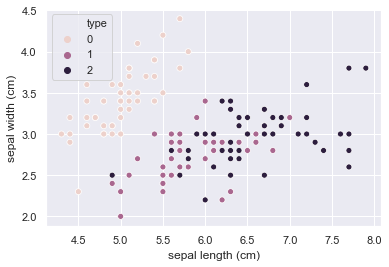

In [ ]:
import seaborn as sns
sns.set()
sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="type", data=my_data)

As we can see therea is a clear cluster for flowers of type 0 (setosa), while it is not clear the difference between type 1 (versicolor) and type 2 (virginica). Let us visualise the data according to their petal lenght and width and examine the output.

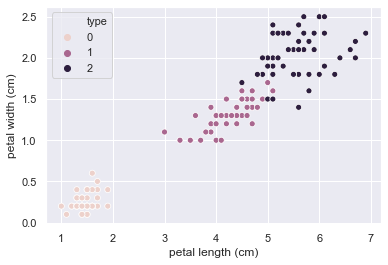

In [ ]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="type", data=my_data)

In this case, it looks that the petal provides a better feature for our classification.

Let us create a KNN classifier. The classifier includes the following:
- Importing the appropriate model (KNeighborsClassifier)
- Extracting X and y variables from the dataset
- Fitting the model using the data and the target variables
- The output of our model includes some information for our model, such as the number of neighbors etc.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
X = data.data
y = data.target
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
user_input = [3, 5, 6, 2.5]
knn.predict([user_input])

array([2])

In [ ]:
#sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="type", legend=False,data=my_data)
#sns.scatterplot(x=4, y=2, hue="type", data=my_data, marker="x",s=121)

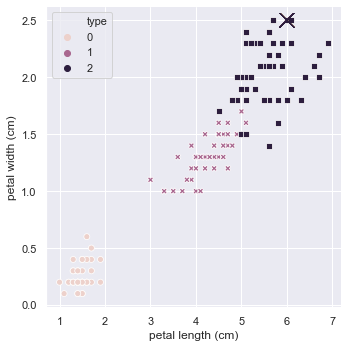

In [ ]:
sns.relplot(x="petal length (cm)", y="petal width (cm)", hue="type", style="type", kind="scatter",  legend=False, data=my_data)

sns.scatterplot(x=6, y=2.5, hue="type", data=my_data, marker="x",s=200)